# KMeans on Iris Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for easy visualization (sepal length and sepal width)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# The Implementation

### K-Means Overview:
1. **Objective**: The goal of K-Means is to partition the data into $k$ clusters, where each point belongs to the cluster with the nearest centroid. A centroid is the mean of points in a cluster.
2. **Steps**:
   - **Initialization**: Randomly select $k$ points as initial centroids.
   - **Assignment step**: Assign each data point to the nearest centroid.
   - **Update step**: Recalculate centroids by finding the mean of points in each cluster.
   - **Repeat**: Continue until the centroids stabilize (or the changes fall below a threshold).

### Math Behind K-Means:
- **Centroids**: Each centroid is the mean of the points in its cluster.
  $$
  \mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j
  $$
  where $\mu_i$ is the centroid for cluster $i$, and $C_i$ is the set of points assigned to that cluster.

- **Distance Calculation**: To assign points to clusters, the distance between each point and all centroids is computed. The most common choice is the Euclidean distance:
  $$
  d(x, \mu_i) = \sqrt{\sum (x_j - \mu_{ij})^2}
  $$
  where $x_j$ is the $j$-th feature of the point, and $\mu_{ij}$ is the corresponding feature of the centroid.

- **Convergence**: The algorithm stops when the centroids don’t move significantly, typically when the change is less than a threshold (tolerance, tol). Mathematically, you check:
  $$
  ||\mu_{\text{new}} - \mu_{\text{old}}|| < \text{tol}
  $$
  for all centroids.

### Plan for Implementation:
1. **Initialize Centroids**:
   - Randomly select $k$ data points from the dataset to be the initial centroids.
2. **Assign Clusters**:
   - Compute the distance from each point to each centroid.
   - Assign each point to the nearest centroid.
3. **Update Centroids**:
   - For each cluster, compute the mean of the points assigned to it and update the centroid.
4. **Repeat**:
   - Iterate the assignment and update steps until convergence (or a maximum number of iterations).


### Step 1: `__init__` Method
- **Objective**: Set up the basic parameters for K-Means.
- **Parameters**:
  - `k`: The number of clusters (default is 3).
  - `max_iters`: Maximum number of iterations to run the algorithm (default is 100).
  - `tol`: Tolerance for centroid movement (default is 0.0001), used to decide when to stop iterating.

#### Math Explanation:
- These are just hyperparameters to control the behavior of the algorithm. $k$ defines how many clusters you're going to create, and `max_iters` controls how long the algorithm runs. `tol` helps determine when the centroids have stabilized (i.e., when the difference between old and new centroids is smaller than this tolerance).

Now, you can fill in the `__init__` method by storing these values in instance variables like `self.k`, `self.max_iters`, and `self.tol`.

---

### Step 2: `fit` Method (Centroid Initialization)
Next, let's tackle the `fit` method, where the magic starts!

#### Task for this step:
1. **Initialize Centroids**: We need to randomly select $k$ points from the dataset to serve as the initial centroids.

#### Math Behind Initialization:
- Randomly pick $k$ points from the dataset $X$ to initialize centroids. 
- This is simply picking points from $X$ without replacement.

In NumPy, we can randomly choose these points using:
```python
np.random.choice(X.shape[0], self.k, replace=False)

```
### Next Step: Assigning Points to Clusters
We need to assign each point in the dataset to the nearest centroid based on the Euclidean distance. This process is known as the "assignment step" of K-Means.

#### Task:
1. **Calculate Distance**: For each point in $X$, compute its distance to each of the centroids. The most common distance metric is **Euclidean distance**.
   - Euclidean distance formula between a point $x$ and a centroid $\mu$:
   $$
   d(x, \mu) = \sqrt{\sum (x_j - \mu_j)^2}
   $$
   where $x_j$ is a feature of the point and $\mu_j$ is the corresponding feature of the centroid.

2. **Assign to Closest Centroid**: Once you've computed the distances for all points to all centroids, assign each point to the nearest centroid.

This is implemented in the `_assign_clusters` method, where the algorithm will calculate distances and assign points to the nearest centroid.


### Next Step: Update Centroids
After assigning points to their closest centroids, the next step is to update the centroids based on the new cluster assignments.

#### Task:
1. For each cluster, calculate the **mean** of the points assigned to that cluster.
2. Update the centroid to this new mean value.

#### Detailed Steps:
- Loop over each centroid (there are `k` centroids).
- For each centroid, find the points in `X` that are assigned to that cluster (you can use the labels stored in `self.labels` to find which points belong to which cluster).
- Calculate the mean of the points in the cluster (you can use `np.mean`).
- Update the centroid by setting it to this mean value.

#### Math Behind:
For each centroid $\mu_i$, you want to update it as the mean of all points assigned to cluster $i$:
$$
\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j
$$
where $C_i$ is the set of points assigned to the $i$-th cluster and $\mu_i$ is the new centroid.

Once you've updated all the centroids, this process will continue iteratively until the centroids stop moving significantly (or the max number of iterations is reached).


### Next Step: Update Centroids
After assigning points to their closest centroids, the next step is to update the centroids based on the new cluster assignments.

#### Task:
1. For each cluster, calculate the **mean** of the points assigned to that cluster.
2. Update the centroid to this new mean value.

#### Detailed Steps:
- Loop over each centroid (there are `k` centroids).
- For each centroid, find the points in `X` that are assigned to that cluster (you can use the labels stored in `self.labels` to find which points belong to which cluster).
- Calculate the mean of the points in the cluster (you can use `np.mean`).
- Update the centroid by setting it to this mean value.

#### Math Behind:
For each centroid $\mu_i$, you want to update it as the mean of all points assigned to cluster $i$:
$$
\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j
$$
where $C_i$ is the set of points assigned to the $i$-th cluster and $\mu_i$ is the new centroid.

Once you've updated all the centroids, this process will continue iteratively until the centroids stop moving significantly (or the max number of iterations is reached).


In [7]:
# K-Means implementation (same as before)
class KMeans:
    def __init__(self, k=3, max_iters=100, tol=0.0001):
        self.k = k
        self.max_iters = max_iters
        self.tol=tol

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)] #Randomly initializing the centroids

        for i in range(self.max_iters): #Running only Max number of times
            self.labels=self._assign_clusters(X) #Assigning each point in X to nearest centroid
            new_centroids = self._compute_centroids(X) #Computing new centroids
            
            if np.all(self._euclidean_distance(new_centroids,self.centroids)<self.tol): # If centroids no longer move to a tolerable level
                break

            self.centroids=new_centroids #Make the centroids the new centroids
    
    def _assign_clusters(self, X): # This will assign clusters to the centroids
        distances = np.zeros((X.shape[0], self.k)) #calculated distances will be held in this array

        for j in range(self.k): #looping through all the centroids
            for i, x in enumerate(X): #going through every single point in x
                distances[i,j] = self._euclidean_distance(x,self.centroids[j]) #calculating the distances between points and centroids
        closest_centroids = np.argmin(distances, axis=1) #Finding the minimum distance to the centroid for each point
        return closest_centroids #returning the clusters
                
            
    def _compute_centroids(self, X):
        new_centroids = np.zeros((self.k, X.shape[1])) #This will hold the new centroids

        for i in range(self.k): #Do this foe every centroid
            points_in_cluster = X[self.labels == i] # finding all the centroid cluster
            if len(points_in_cluster) > 0: #If cluster is not empty do the following
                new_centroids[i] = np.mean(points_in_cluster,axis=0) #calculate the new centroids by averaging the points
        return new_centroids
                
            
        


    def _euclidean_distance(self, v,y): #This function calculates the euclidean distance. Numpy can do this better, but I have hand coded to show it here
        return np.sqrt(np.sum(np.power((v-y),2))) 
        
    def predict(self, X): #The prediction on the data
        return self._assign_clusters(X)

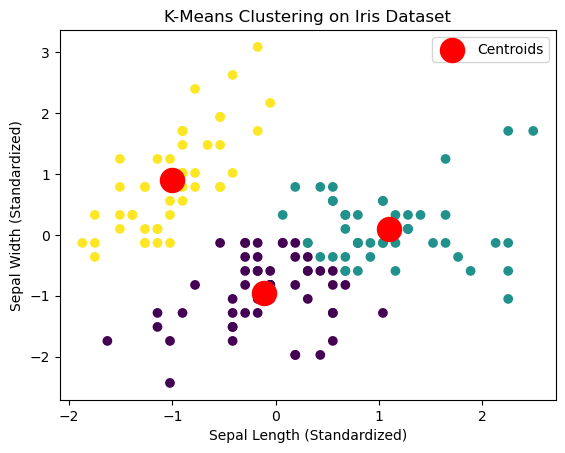

In [8]:

# Initialize and fit KMeans with 3 clusters
kmeans = KMeans(k=3)
kmeans.fit(X_scaled)

# Plot the results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()
